In [1]:
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import fancyimpute

# Visualisation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.stats import kendalltau
from scipy.stats import spearmanr

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Load data
full = pd.read_csv("./datasets/ivy-users.csv")
full['canceled'].fillna(False, inplace=True)
full['relationship_status'].fillna('other', inplace=True)
full['canceled'] = full['canceled'].astype('bool')
full.head()

,user_id,created_at,account_type,metro_area_id,plan,card_approved,date_reactived,credits,canceled,date_canceled,...,avg_weekly_posts,total_favorites,avg_monthly_favorites,avg_weekly_favorites,total_connections,avg_monthly_connections,avg_weekly_connections,total_messages,avg_monthly_messages,avg_weekly_messages
0,62207,2017-10-01 11:23:05 -0400,0,16.0,NaN,NaN,NaN,NaN,False,NaN,...,0.0,0,0,0.000000,0,0,0.000000,0,0,0.000000
1,61443,2017-09-18 13:25:30 -0400,0,16.0,NaN,NaN,NaN,NaN,False,NaN,...,0.0,0,0,0.000000,0,0,0.000000,0,0,0.000000
2,23110,2014-11-24 09:32:54 -0500,3,18.0,NaN,NaN,NaN,NaN,True,2015-12-15 11:29:11 -0500,...,0.0,0,0,0.000000,6,0,0.039867,3,0,0.019934
3,61444,2017-09-18 13:25:56 -0400,0,16.0,NaN,NaN,NaN,NaN,False,NaN,...,0.0,0,0,0.000000,0,0,0.000000,0,0,0.000000
4,53085,2017-05-06 14:28:56 -0400,0,1.0,SCHOLARIVY239,NaN,NaN,0.0,False,NaN,...,0.0,7,1,0.325581,11,2,0.511628,53,10,2.465116


In [2]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60850 entries, 0 to 60849
Data columns (total 44 columns):
user_id                    60850 non-null int64
created_at                 60850 non-null object
account_type               60850 non-null int64
metro_area_id              60831 non-null float64
plan                       11276 non-null object
card_approved              31 non-null object
date_reactived             487 non-null object
credits                    5525 non-null float64
canceled                   60850 non-null bool
date_canceled              4413 non-null object
birth_year                 60600 non-null float64
gender                     47355 non-null object
nationality                15888 non-null object
complete_enough            60850 non-null bool
complete                   60850 non-null bool
relationship_status        60850 non-null object
has_phone                  60850 non-null bool
has_facebook               60850 non-null bool
has_linkedin             

In [3]:
full.describe()

,user_id,account_type,metro_area_id,credits,birth_year,months,weeks,total_rsvps,avg_monthly_rsvps,avg_weekly_rsvps,...,avg_weekly_posts,total_favorites,avg_monthly_favorites,avg_weekly_favorites,total_connections,avg_monthly_connections,avg_weekly_connections,total_messages,avg_monthly_messages,avg_weekly_messages
count,60850.000000,60850.000000,60831.000000,5525.000000,60600.000000,60850.000000,60850.000000,60850.000000,60850.000000,60850.000000,...,60850.000000,60850.000000,60850.000000,60850.000000,60850.000000,60850.000000,60850.000000,60850.000000,60850.000000,60850.000000
mean,31952.416697,1.072868,12.731420,14.727964,1983.920281,27.052309,116.324929,2.665801,0.099737,0.039814,...,0.001525,0.541627,0.058685,0.017453,5.348151,0.488168,0.134466,9.107823,0.519145,0.142585
std,18345.591761,1.302817,15.986162,38.514167,9.037114,19.998520,85.993637,8.781016,0.499695,0.132929,...,0.019550,4.660583,0.904515,0.215415,14.740807,2.176859,0.519504,57.269723,4.995833,1.169075
min,5.000000,0.000000,1.000000,0.000000,1088.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16536.250000,0.000000,1.000000,0.000000,1981.000000,9.000000,38.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32502.500000,0.000000,4.000000,0.000000,1985.000000,22.000000,94.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47830.750000,3.000000,16.000000,0.000000,1989.000000,49.000000,210.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.008306,3.000000,0.000000,0.020764
max,63062.000000,3.000000,51.000000,579.000000,2015.000000,60.000000,258.000000,245.000000,14.000000,3.255814,...,2.635659,269.000000,67.000000,15.639535,953.000000,69.000000,16.046512,4856.000000,523.000000,121.821705


In [4]:
def plot_missing_values(data):
    missing_df = data.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df.ix[missing_df['missing_count']>0]
    missing_df = missing_df.sort_values(by='missing_count')

    ind = np.arange(missing_df.shape[0])
    fig, ax = plt.subplots(figsize=(11,4))
    width = 0.75
    rects = ax.barh(ind, missing_df.missing_count.values, color='darkblue')
    ax.set_yticks(ind)
    ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
    ax.set_xlabel("Count of missing values")
    ax.set_title("Number of missing values in each column")
    for i, v in enumerate(missing_df.missing_count.values):
        ax.text(v, i, str(v), fontweight='bold', fontsize=16, color='red')
    plt.show()
    
def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    color = kwargs.get( 'color', 'salmon')
    facet = sns.FacetGrid( df , row = row , col = col , size = 20)
    facet.map( sns.barplot , cat , target, color=color, ci=None )
    facet.add_legend()

## Data Exploration

### Missing Values

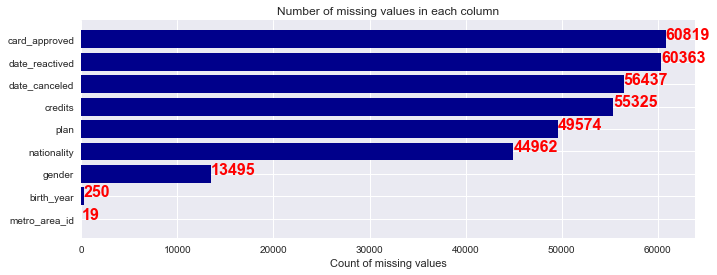

In [27]:
plot_missing_values(full)

### Univariate Plots

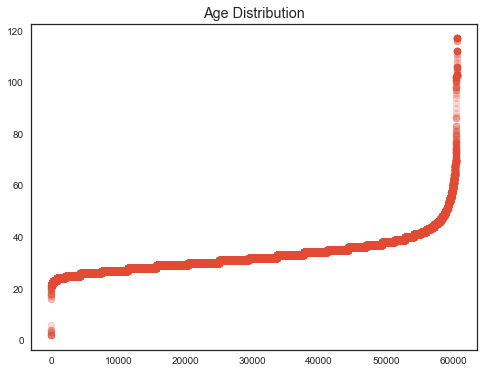

In [6]:
full_c = full[(full['birth_year'].notnull())]
full_c['age'] = 2017.0 - full_c['birth_year']
full_c = full_c[(full_c['age'] < 200)]
plt.scatter(range(full_c.shape[0]), np.sort(full_c['age']), alpha=0.2)
plt.title("Age Distribution")
# Most users' age is between 20 to 40 which sould be our target users for marketing.

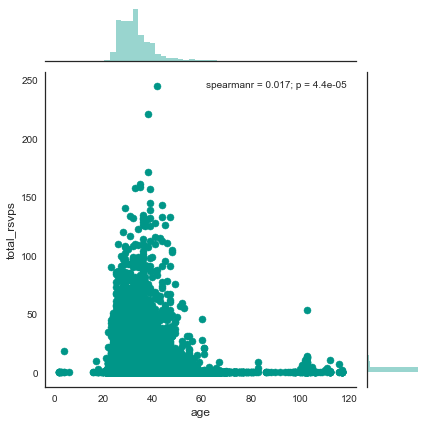

In [7]:
sns.jointplot("age", "total_rsvps", data=full_c, stat_func=spearmanr, color="#009688")

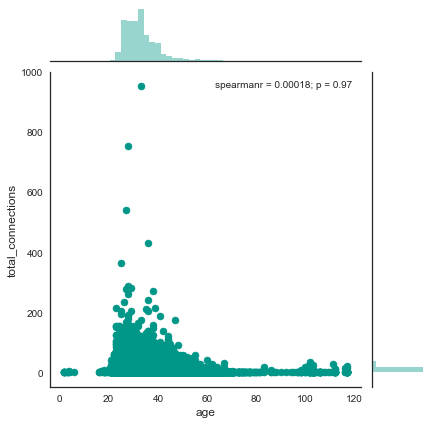

In [8]:
sns.jointplot("age", "total_connections", data=full_c, stat_func=spearmanr, color="#009688")

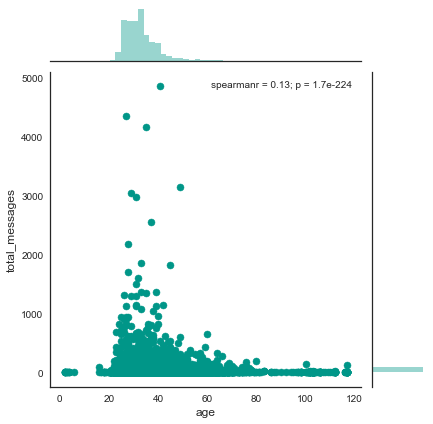

In [9]:
sns.jointplot("age", "total_messages", data=full_c, stat_func=spearmanr, color="#009688")

### Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114dd7fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1171cd190>]], dtype=object)

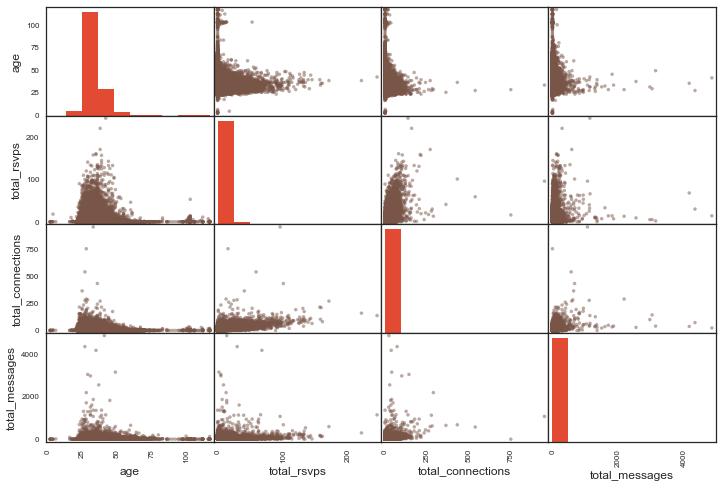

In [10]:
from pandas.tools.plotting import scatter_matrix
attributes = ["age", "total_rsvps", "total_connections", "total_messages"]
scatter_matrix(full_c[attributes], figsize=(12, 8), color="#795548")


### Corrolation

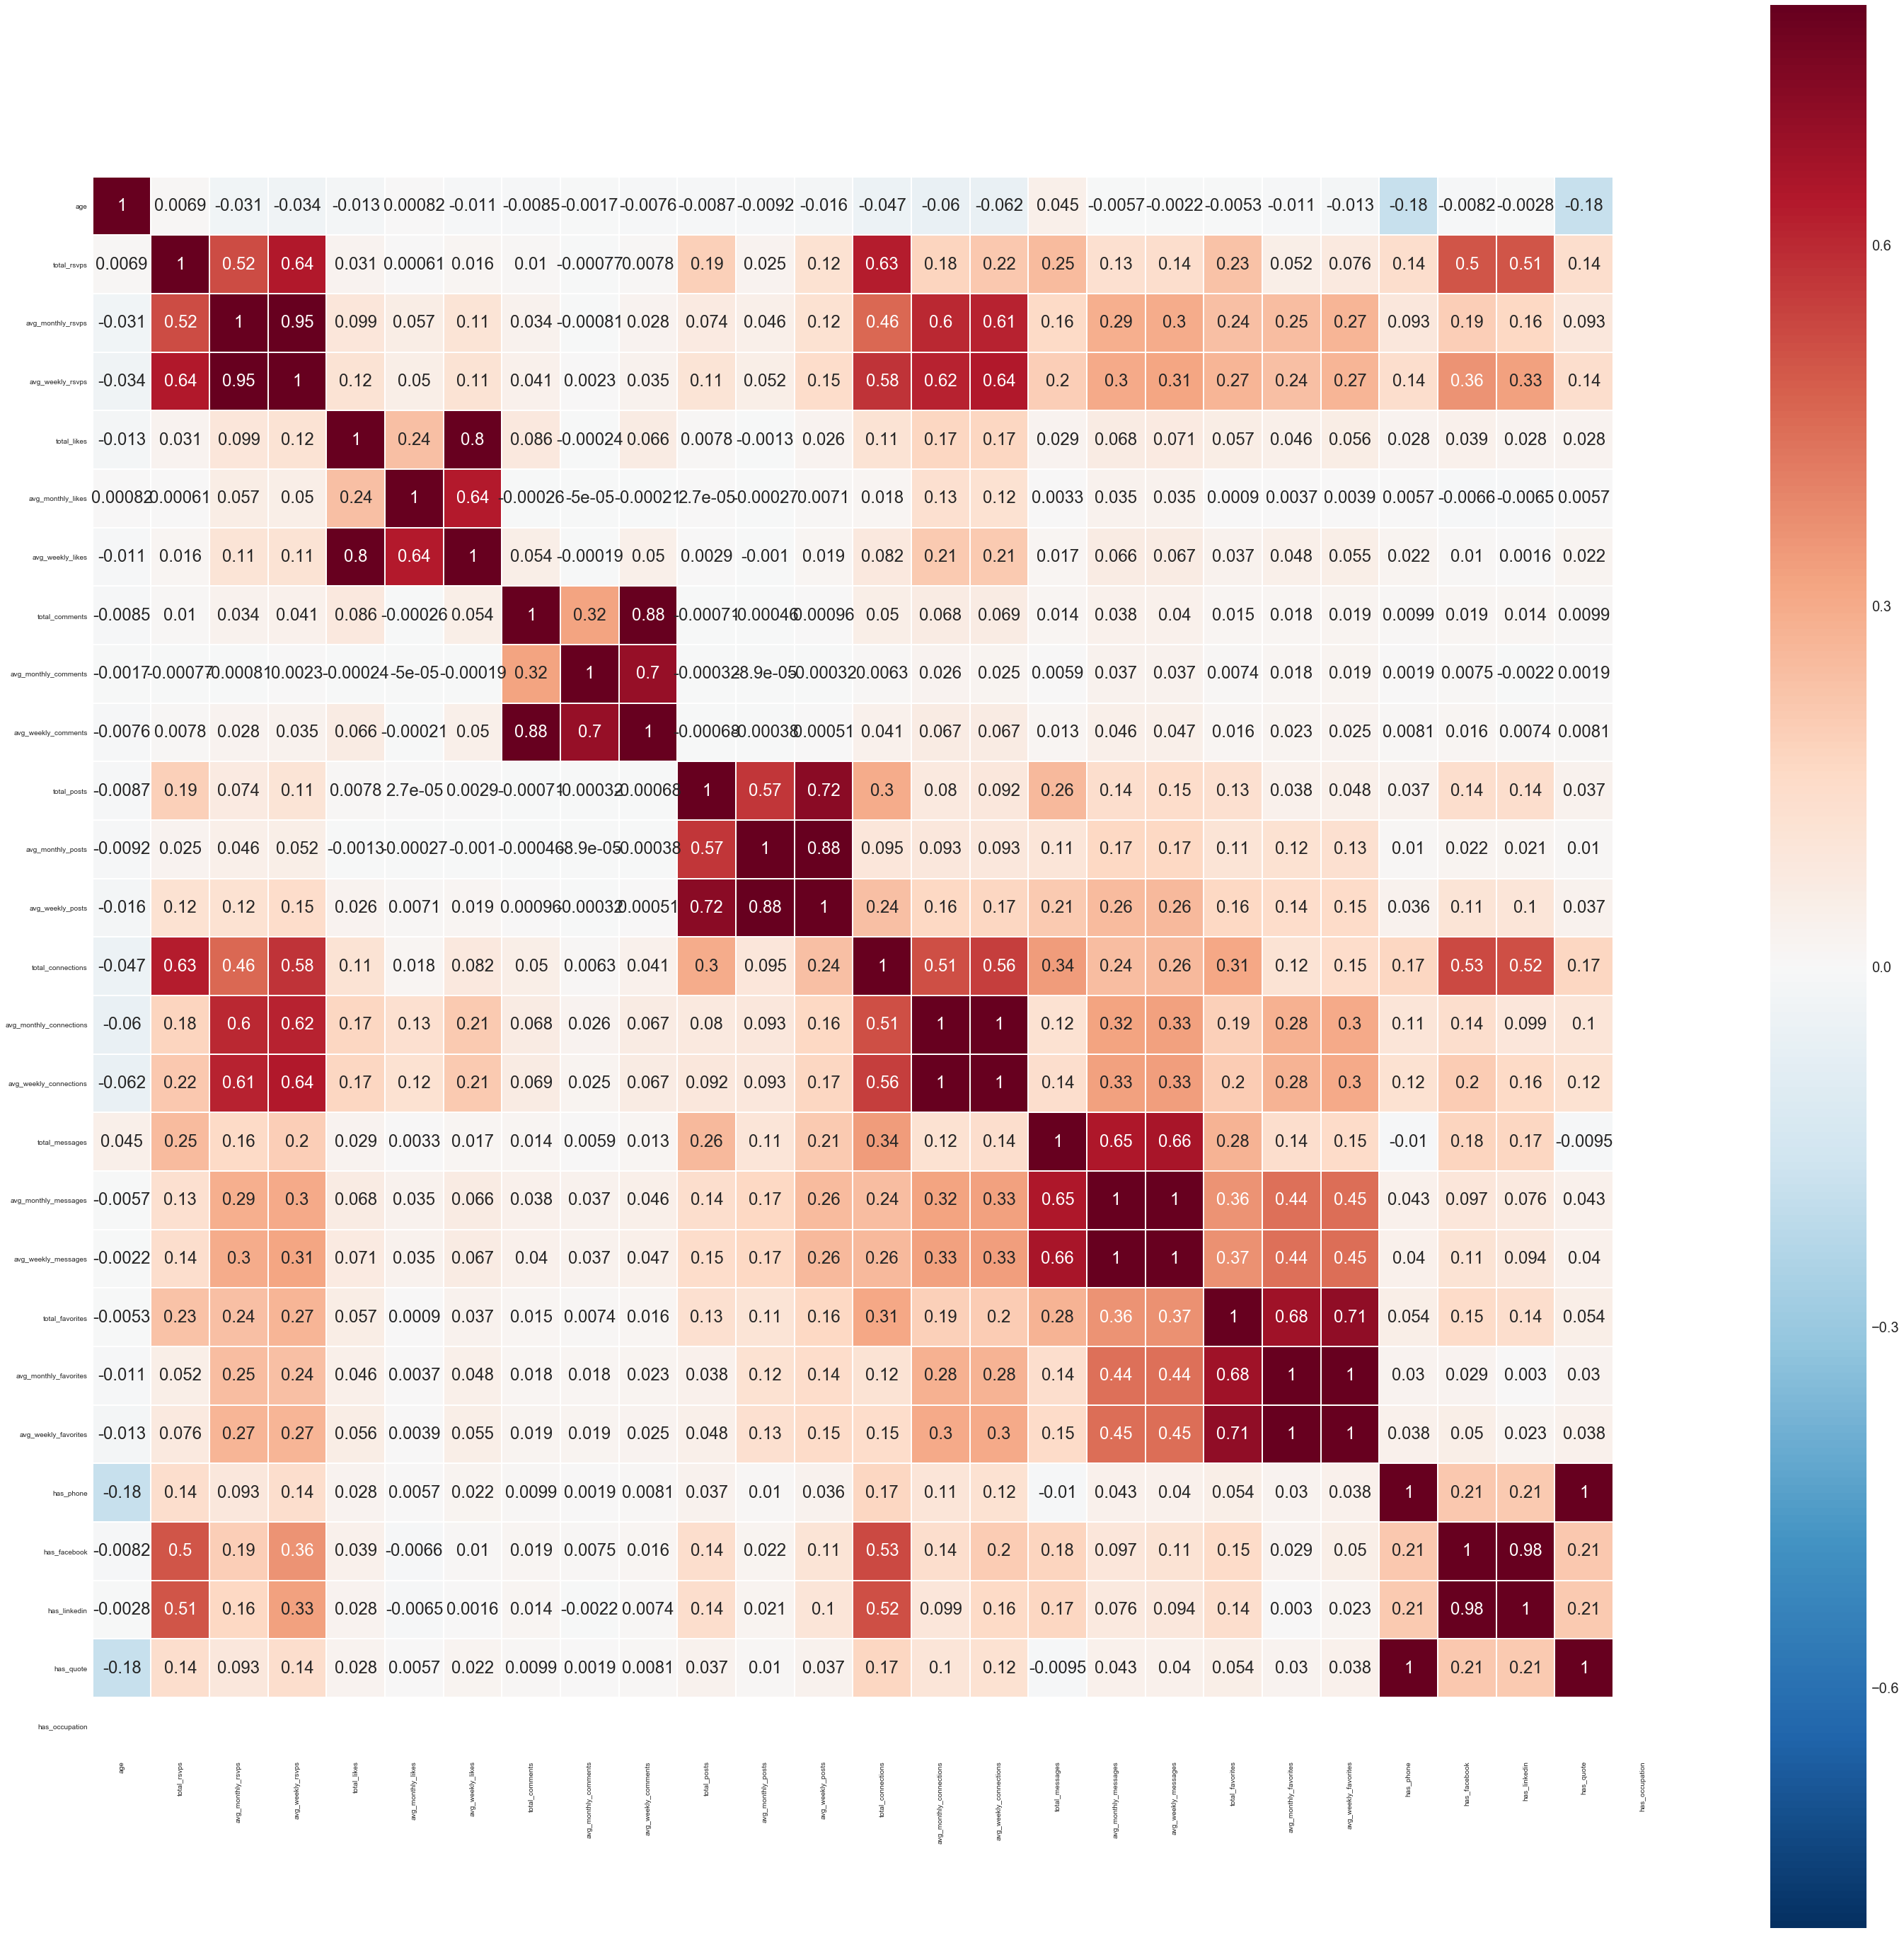

In [11]:
full_corr = full_c[['age', 'total_rsvps', 'avg_monthly_rsvps', 'avg_weekly_rsvps', 'total_likes', 'avg_monthly_likes', 'avg_weekly_likes', 'total_comments', 'avg_monthly_comments', 'avg_weekly_comments', 'total_posts', 'avg_monthly_posts', 'avg_weekly_posts', 'total_connections', 'avg_monthly_connections', 'avg_weekly_connections', 'total_messages', 'avg_monthly_messages', 'avg_weekly_messages', 'total_favorites', 'avg_monthly_favorites', 'avg_weekly_favorites', 'has_phone', 'has_facebook', 'has_linkedin', 'has_quote', 'has_occupation']]
fig, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=2)
sns.heatmap(full_corr.corr(), annot=True, vmax=0.8, square=True, linewidths=1, ax=ax)

# age and connections are negative related


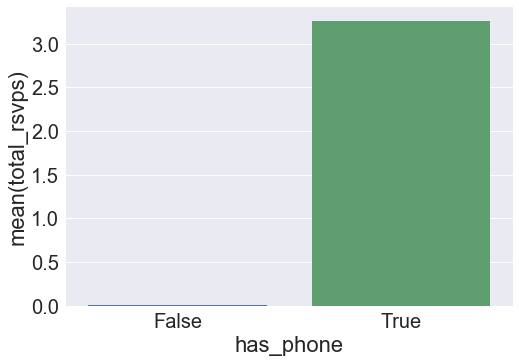

In [12]:
sns.barplot(x="has_phone", y="total_rsvps", data=full_c, ci=None)

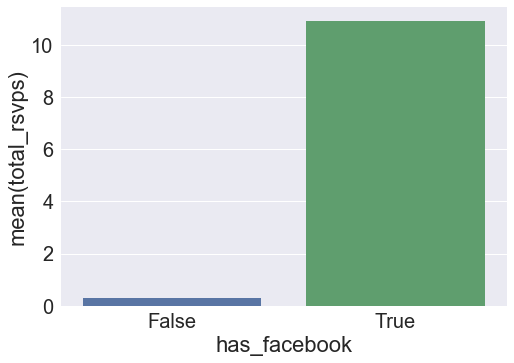

In [13]:
sns.barplot(x="has_facebook", y="total_rsvps", data=full_c, ci=None)

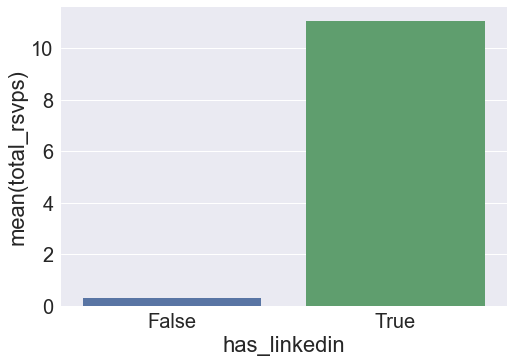

In [14]:
sns.barplot(x="has_linkedin", y="total_rsvps", data=full_c, ci=None)

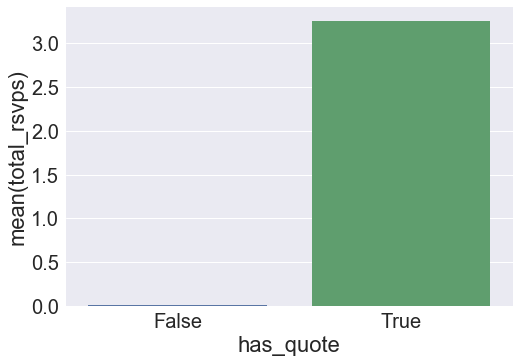

In [15]:
sns.barplot(x="has_quote", y="total_rsvps", data=full_c, ci=None)

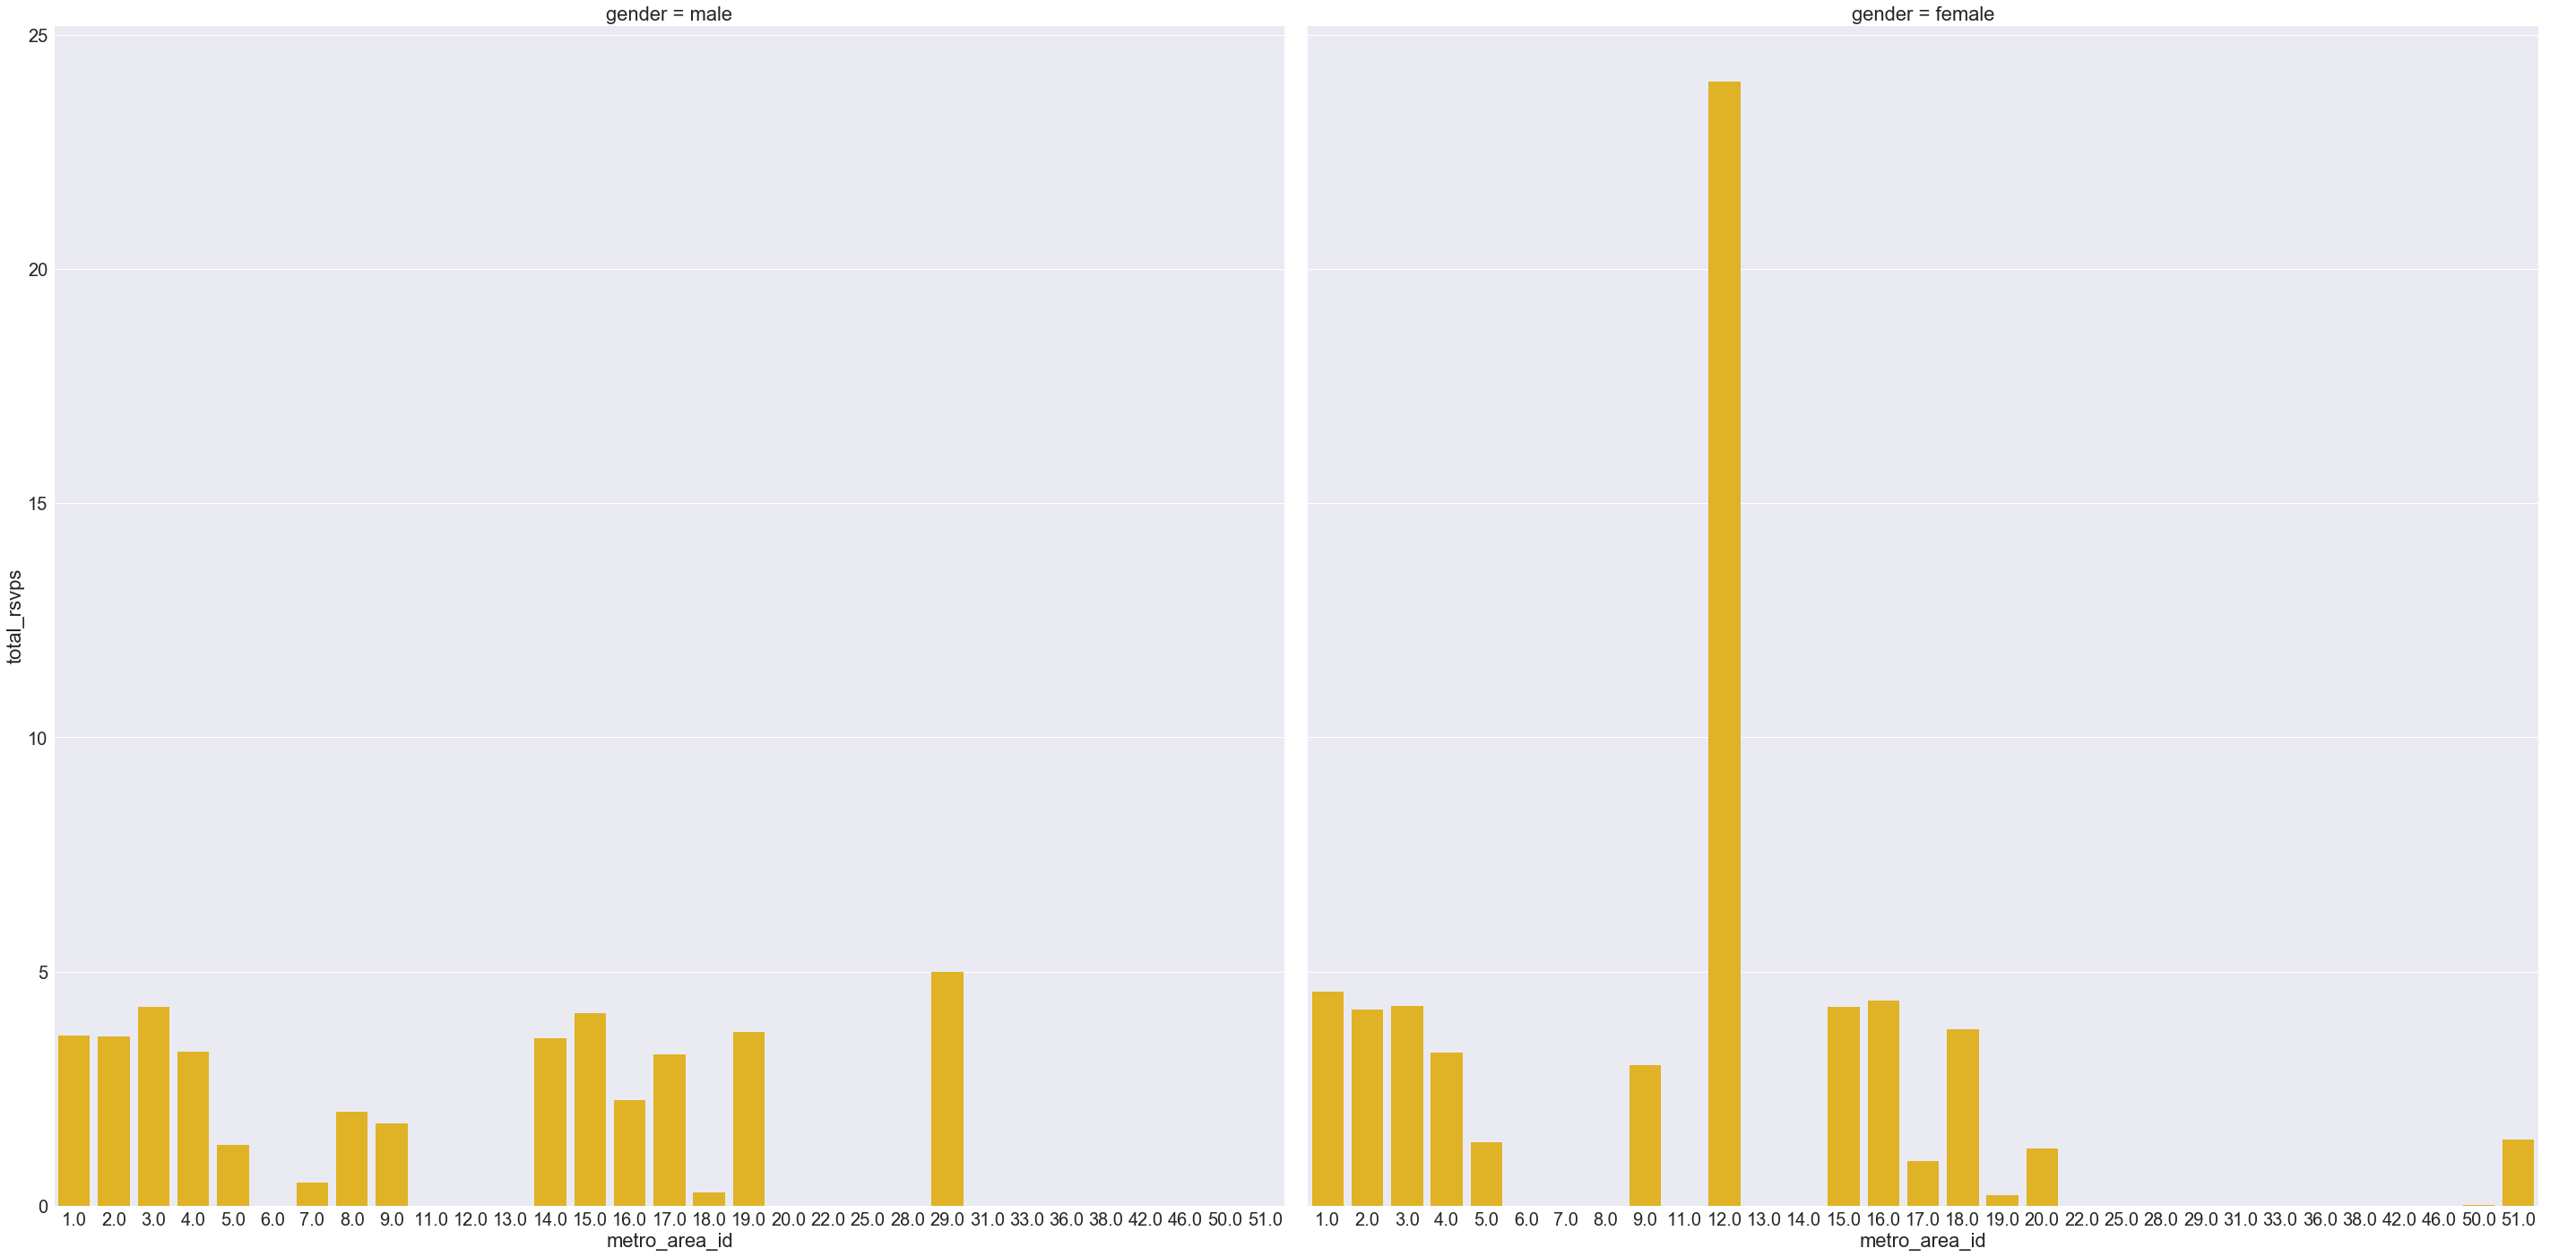

In [16]:
plot_categories(full_c, cat='metro_area_id', target= 'total_rsvps', col='gender', color="#FFC107")

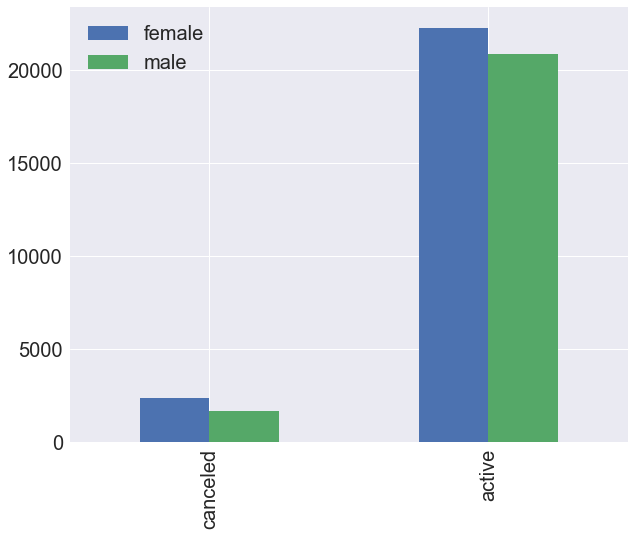

In [17]:
canceled = full_c[full_c['canceled']==True]['gender'].value_counts()
active = full_c[full_c['canceled']==False]['gender'].value_counts()
canceled_active = pd.DataFrame([canceled, active])
canceled_active.index = ['canceled','active']
canceled_active.plot(kind='bar', figsize=(10,8))

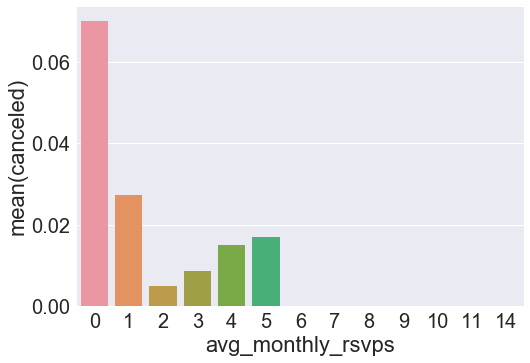

In [18]:
sns.barplot(x="avg_monthly_rsvps", y="canceled", data=full_c, ci=None)

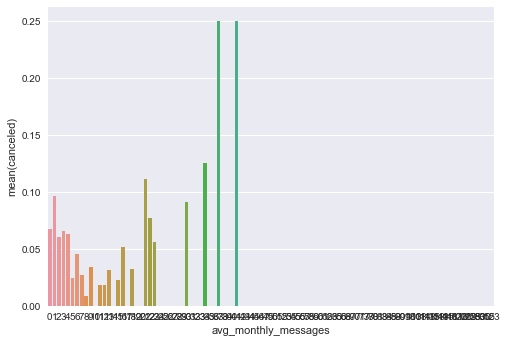

In [19]:
sns.set(font_scale=1)
sns.barplot(x="avg_monthly_messages", y="canceled", data=full_c, ci=None)

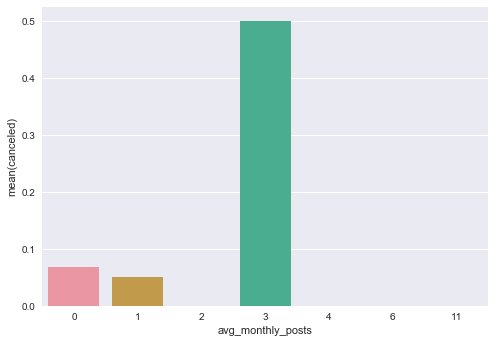

In [20]:
sns.set(font_scale=1)
sns.barplot(x="avg_monthly_posts", y="canceled", data=full_c, ci=None)

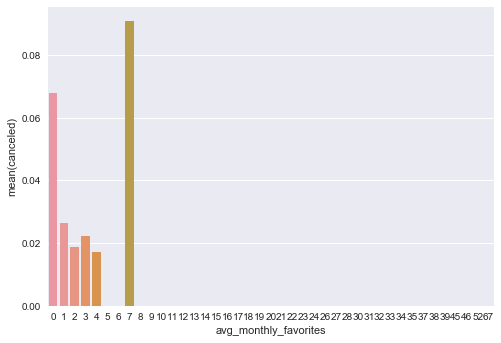

In [21]:
sns.set(font_scale=1)
sns.barplot(x="avg_monthly_favorites", y="canceled", data=full_c, ci=None)

Feature ranking:
1. feature 17 (0.125224)
2. feature 19 (0.114557)
3. feature 5 (0.112611)
4. feature 3 (0.083446)
5. feature 4 (0.080703)
6. feature 7 (0.079793)
7. feature 0 (0.070999)
8. feature 22 (0.054408)
9. feature 20 (0.050784)
10. feature 27 (0.047700)
11. feature 2 (0.039906)
12. feature 28 (0.029446)
13. feature 25 (0.019082)
14. feature 1 (0.018777)
15. feature 18 (0.017148)
16. feature 29 (0.012229)
17. feature 26 (0.011632)
18. feature 23 (0.010866)
19. feature 16 (0.007281)
20. feature 14 (0.005785)
21. feature 21 (0.005604)
22. feature 6 (0.001530)
23. feature 24 (0.000225)
24. feature 10 (0.000193)
25. feature 15 (0.000032)
26. feature 8 (0.000026)
27. feature 9 (0.000013)
28. feature 11 (0.000000)
29. feature 12 (0.000000)
30. feature 13 (0.000000)
31. feature 30 (0.000000)


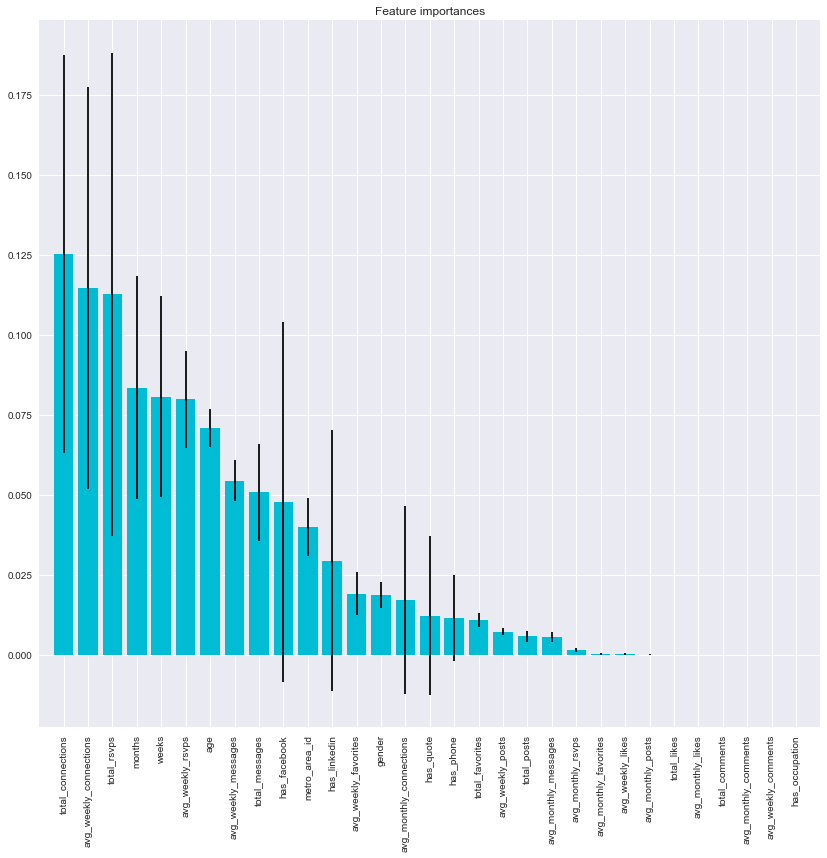

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split




dataset = full_c[['age', 'gender', 'metro_area_id', 'months', 'weeks', 'total_rsvps', 'avg_monthly_rsvps', 'avg_weekly_rsvps', 'total_likes', 'avg_monthly_likes', 'avg_weekly_likes', 'total_comments', 'avg_monthly_comments', 'avg_weekly_comments', 'total_posts', 'avg_monthly_posts', 'avg_weekly_posts', 'total_connections', 'avg_monthly_connections', 'avg_weekly_connections', 'total_messages', 'avg_monthly_messages', 'avg_weekly_messages', 'total_favorites', 'avg_monthly_favorites', 'avg_weekly_favorites', 'has_phone', 'has_facebook', 'has_linkedin', 'has_quote', 'has_occupation', 'canceled']]
dataset = dataset[(dataset['gender'].notnull()) & (dataset['metro_area_id'].notnull())]
dataset['metro_area_id'] = dataset['metro_area_id'].astype('int')
dataset = dataset.assign(gender = lambda x: x.gender.map( {'female': 0, 'male': 1} ))


y = dataset['canceled']
X = dataset.drop('canceled', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y)

clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train,y_train)
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="#00BCD4", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()